In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
path = '/gdrive/My Drive/ML:March2020/data/'

In [ ]:
data= pd.read_csv(path+'Mall_Customers.csv')

In [ ]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Unnamed: 5
0,1,Male,19,15,39,39
1,2,Male,21,15,81,81
2,3,Female,20,16,6,6
3,4,Female,23,16,77,77
4,5,Female,31,17,40,40


In [ ]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Unnamed: 5'],
      dtype='object')

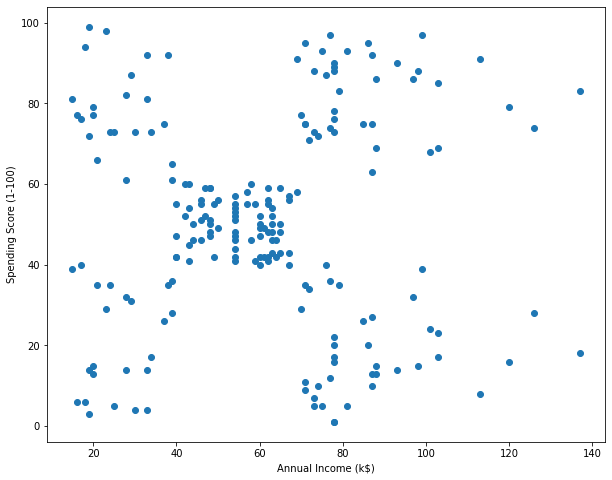

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter('Annual Income (k$)', 'Spending Score (1-100)',data=data )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
x=data.iloc[:,3:5]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [ ]:
x =np.array(x)

In [ ]:
k=5
def init_centroids(X,k):
  m,n=X.shape
  centroids =np.zeros((k,n))
  index =np.random.randint(0,m,k)

  for i in range (k):
    centroids[i,:]= X[index[i],:]

  return centroids

In [ ]:
initial_centroids= init_centroids(x,k)

In [ ]:
initial_centroids

array([[72., 71.],
       [54., 41.],
       [72., 71.],
       [78., 17.],
       [18., 94.]])

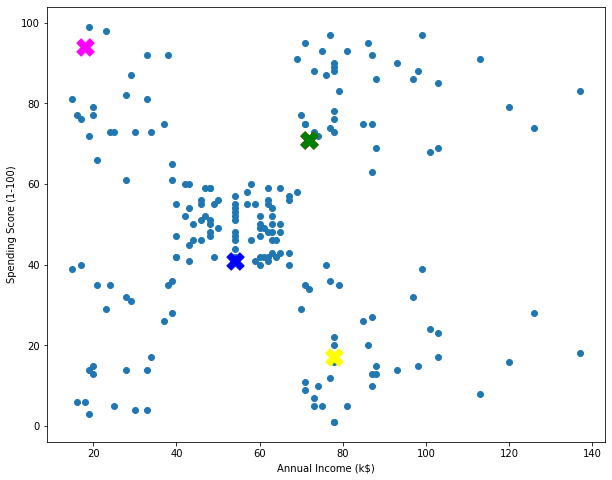

In [ ]:
color = ['red','blue','green','yellow','magenta']
K=5
fig, ax=plt.subplots(figsize=(10,8))
ax.scatter('Annual Income (k$)','Spending Score (1-100)', data=data)
for z in range(K):
  ax.scatter(initial_centroids[z][0],initial_centroids[z][1],marker='X', s=300, c=color[z])

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
def find_closest_centroids(X, centroids):
    m = X.shape[0] 
    k = centroids.shape[0]    
    nearby_centroid = np.zeros(m)   
    
    for i in range(m):
        min_dist = float('inf') 

        
        for j in range(k):
           
            dist = np.sum((X[i,:] - centroids[j,:]) ** 2) 
            if dist < min_dist:
                min_dist = dist 
                nearby_centroid[i] = j 
    
    return nearby_centroid 

In [ ]:
nearby_centroid = find_closest_centroids(x, initial_centroids)
print(nearby_centroid)

[1. 4. 1. 4. 1. 4. 1. 4. 1. 4. 1. 4. 1. 4. 1. 4. 1. 4. 1. 4. 1. 4. 1. 4.
 1. 4. 1. 1. 1. 4. 1. 4. 1. 4. 1. 4. 1. 4. 1. 4. 1. 4. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.
 0. 1. 0. 0. 3. 0. 1. 0. 3. 0. 3. 0. 3. 0. 3. 0. 3. 0. 3. 0. 3. 0. 1. 0.
 3. 0. 3. 0. 3. 0. 3. 0. 3. 0. 3. 0. 3. 0. 3. 0. 3. 0. 3. 0. 3. 0. 3. 0.
 3. 0. 3. 0. 3. 0. 3. 0. 3. 0. 3. 0. 3. 0. 3. 0. 3. 0. 3. 0. 3. 0. 3. 0.
 3. 0. 3. 0. 3. 0. 3. 0.]


In [ ]:
def compute_centroids(X, nearby_centroid, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
        
    for i in range(k):
        indices = np.where(nearby_centroid == i) #find all the indices that belong to the same cluster

        sum_of_cluster = np.sum(X[indices,:], axis=1)
      
        centroids[i,:] = (sum_of_cluster / len(indices[0])) # mean of the cluster is the centroid
    
    return centroids

In [ ]:
New_centroids = compute_centroids(x, nearby_centroid, k)
New_centroids

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


array([[83.62222222, 78.93333333],
       [47.38383838, 42.77777778],
       [        nan,         nan],
       [87.75      , 17.58333333],
       [24.95      , 81.        ]])

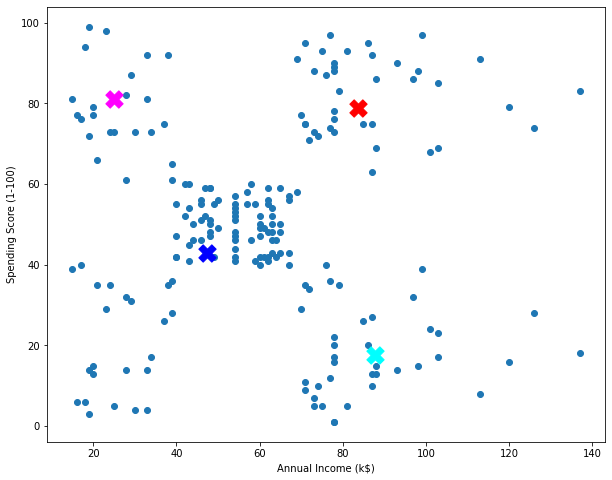

In [ ]:
color=['red','blue','green','cyan','magenta']
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter('Annual Income (k$)', 'Spending Score (1-100)', data=data)
for z in range(K):
  ax.scatter(New_centroids[z][0], New_centroids[z][1], marker='X',s=300, c=color[z] )

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
def k_means(X, initial_centroids, max_iters):
    centroids = initial_centroids
    
    for i in range(max_iters):
        nearby_centroid = find_closest_centroids(X, centroids) 
        centroids = compute_centroids(X, nearby_centroid, k)
    
    return nearby_centroid, centroids

In [ ]:
%%time
nearby_centroid, centroids = k_means(x, initial_centroids, 1500)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


CPU times: user 11.4 s, sys: 23.6 ms, total: 11.4 s
Wall time: 11.4 s


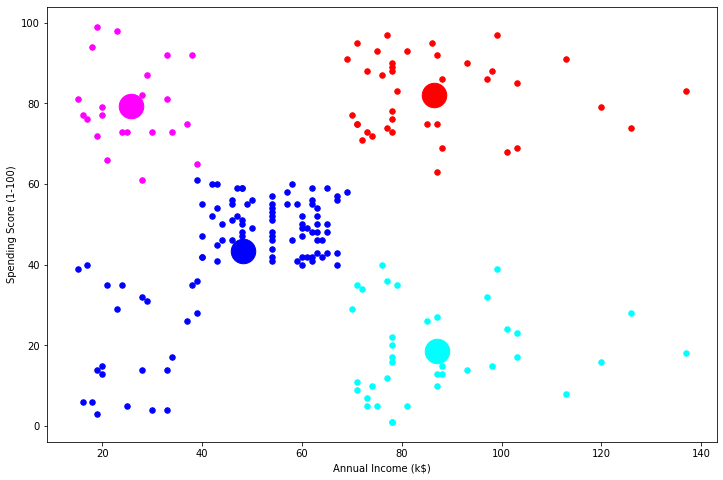

In [ ]:
cluster1 = x[np.where(nearby_centroid == 0)] 
cluster2 = x[np.where(nearby_centroid == 1)] 
cluster3 = x[np.where(nearby_centroid == 2)]
cluster4 = x[np.where(nearby_centroid == 3)] 
cluster5 = x[np.where(nearby_centroid == 4)] 

color=['red','blue','green','cyan','magenta']

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='red', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='blue', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='green', label='Cluster 3')
ax.scatter(cluster4[:,0], cluster4[:,1], s=30, color='cyan', label='Cluster 4')
ax.scatter(cluster5[:,0], cluster5[:,1], s=30, color='magenta', label='Cluster 5')

for z in range(k):
  ax.scatter(centroids[z][0], centroids[z][1], marker='o',s=600, c=color[z] )

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
centroids

array([[86.53846154, 82.12820513],
       [48.16831683, 43.3960396 ],
       [        nan,         nan],
       [87.        , 18.63157895],
       [25.72727273, 79.36363636]])